In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886040401PNS003SRSPEC0039.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.647e-03 +/- 6.540e-04 (63.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.732e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040401PNS003BGSPEC0039.FTZ
  Background Exposure Time: 1.732e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040401PNS003SRCARF0039.FTZ



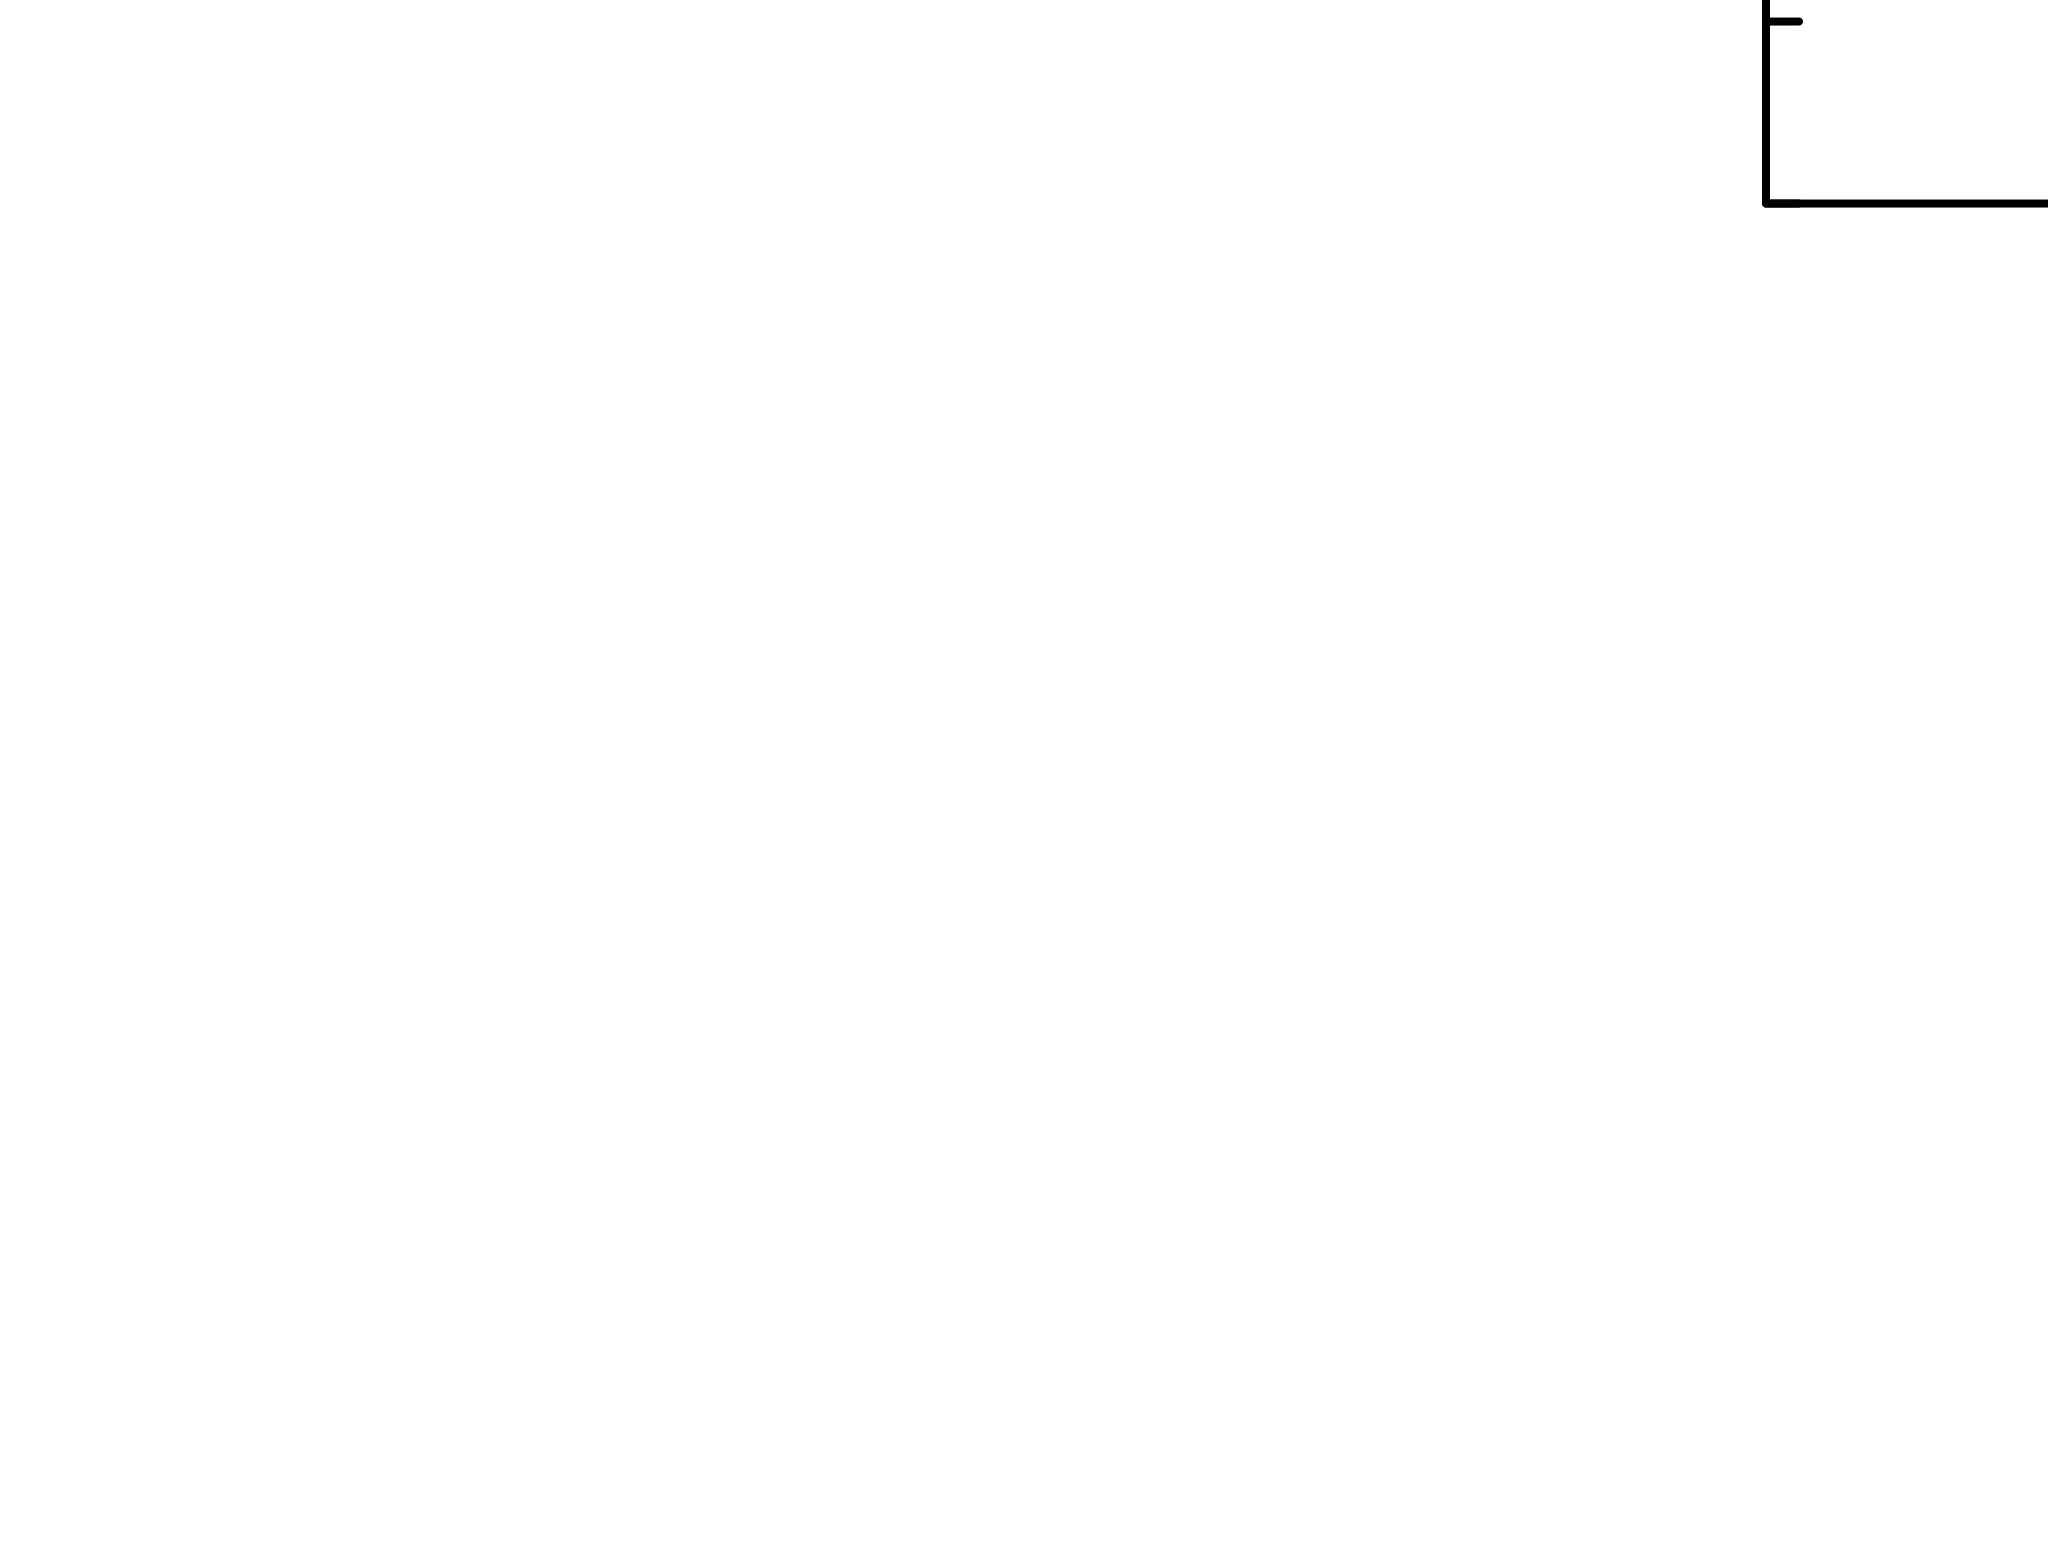

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00005 0.005")
Plot("data")

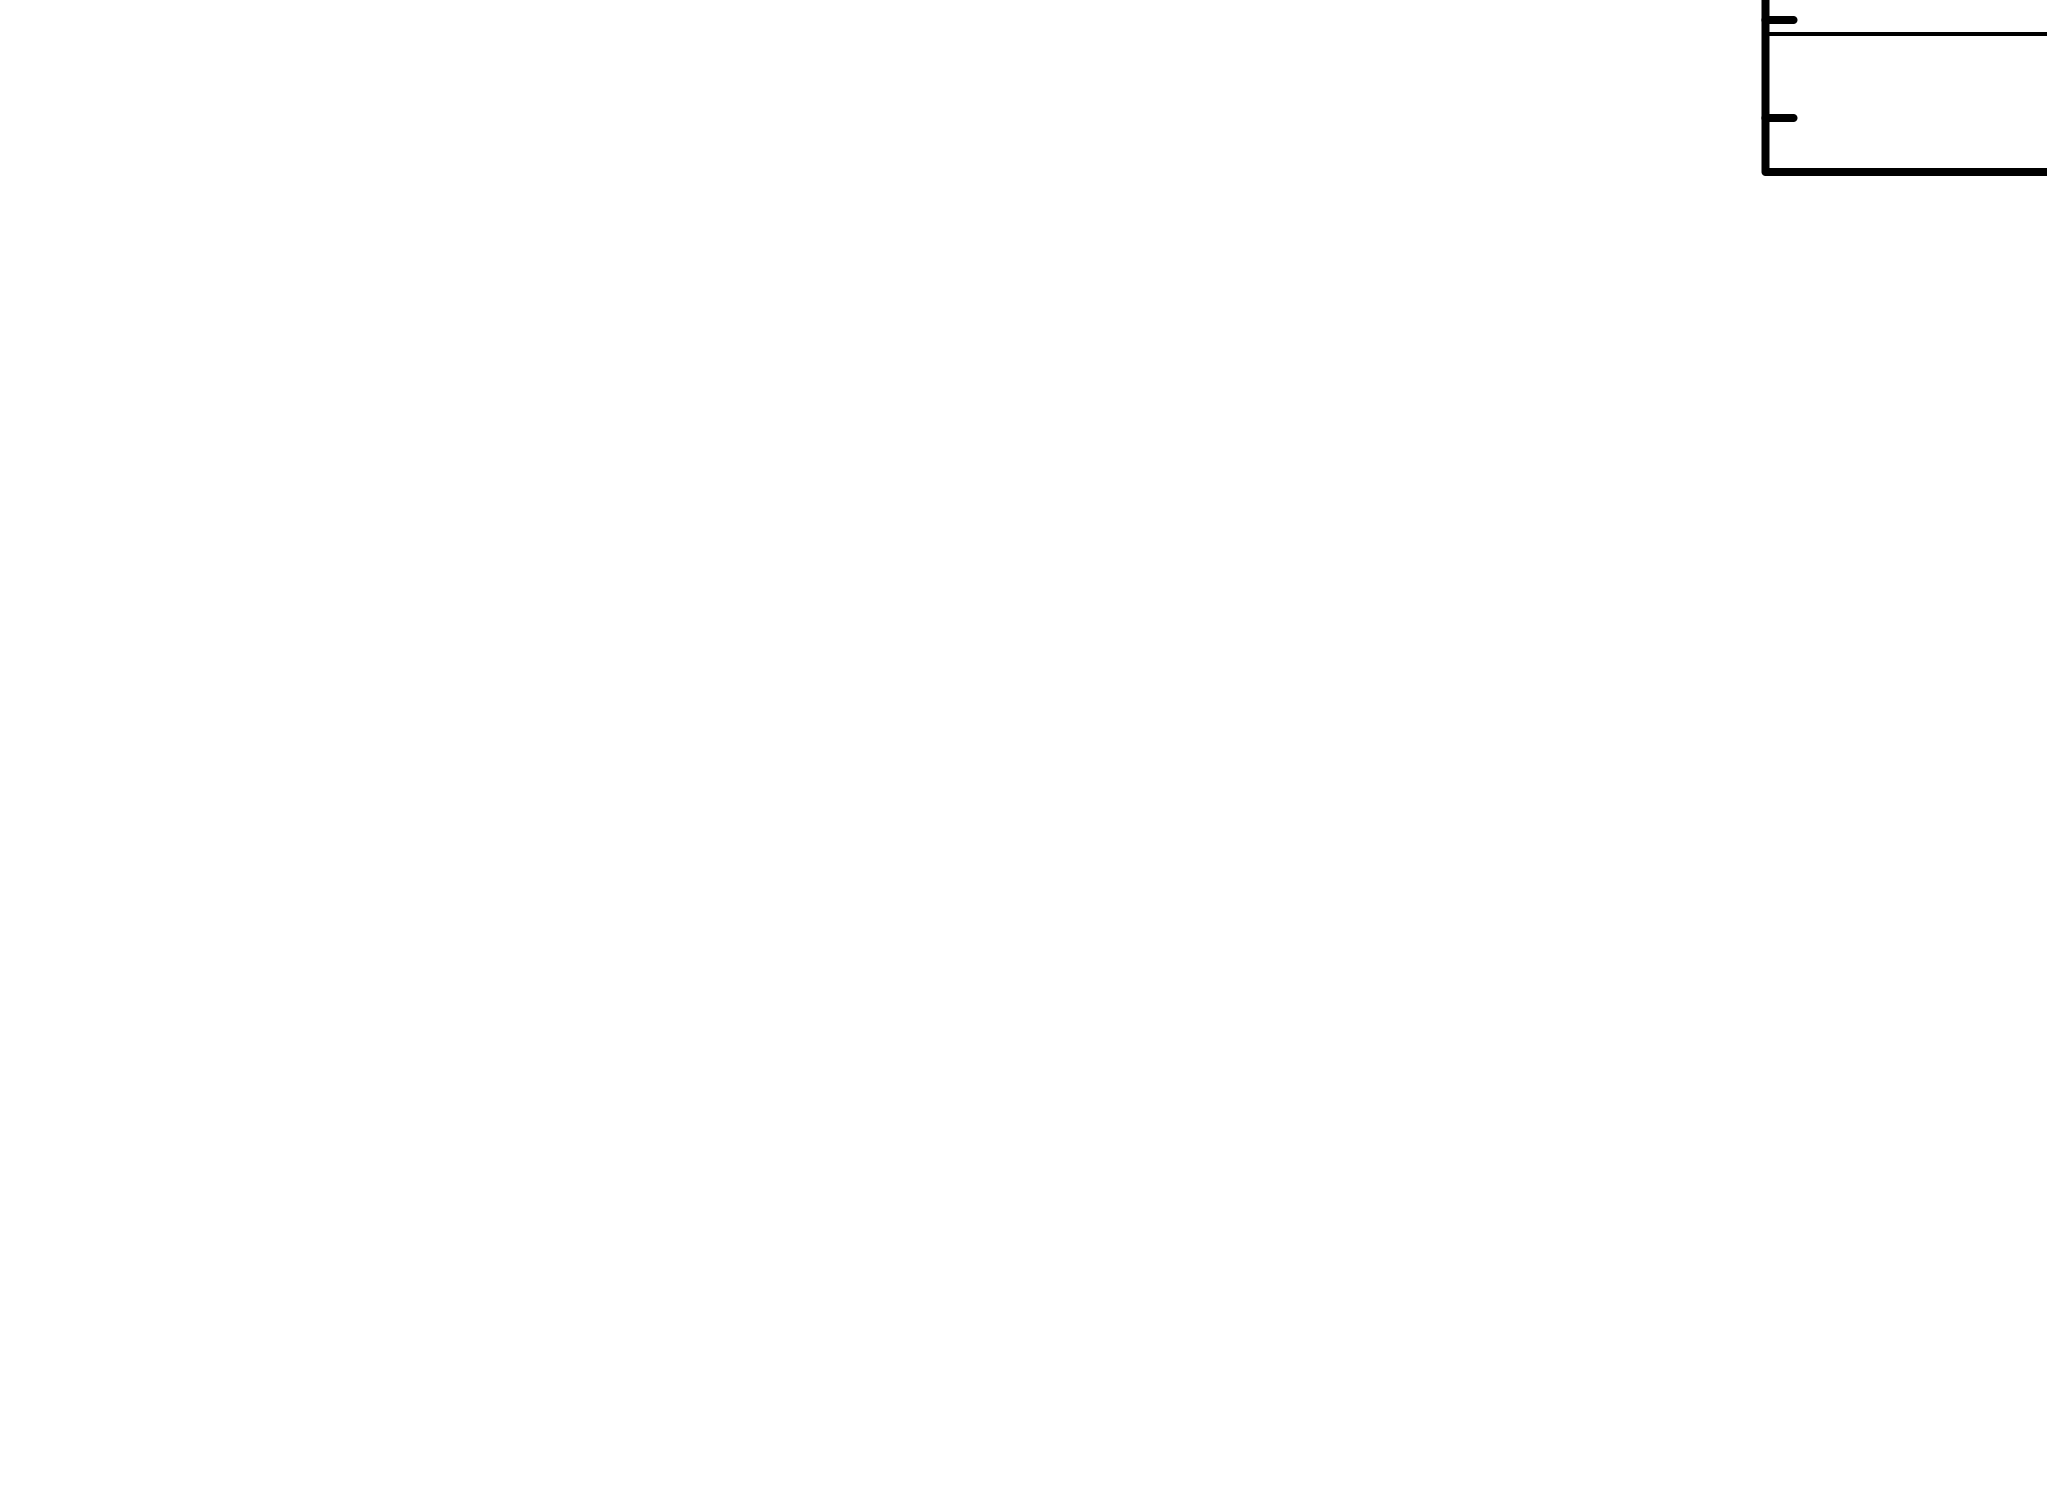


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              2.559646e+12     using 6 bins.

Tes

In [3]:
#spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

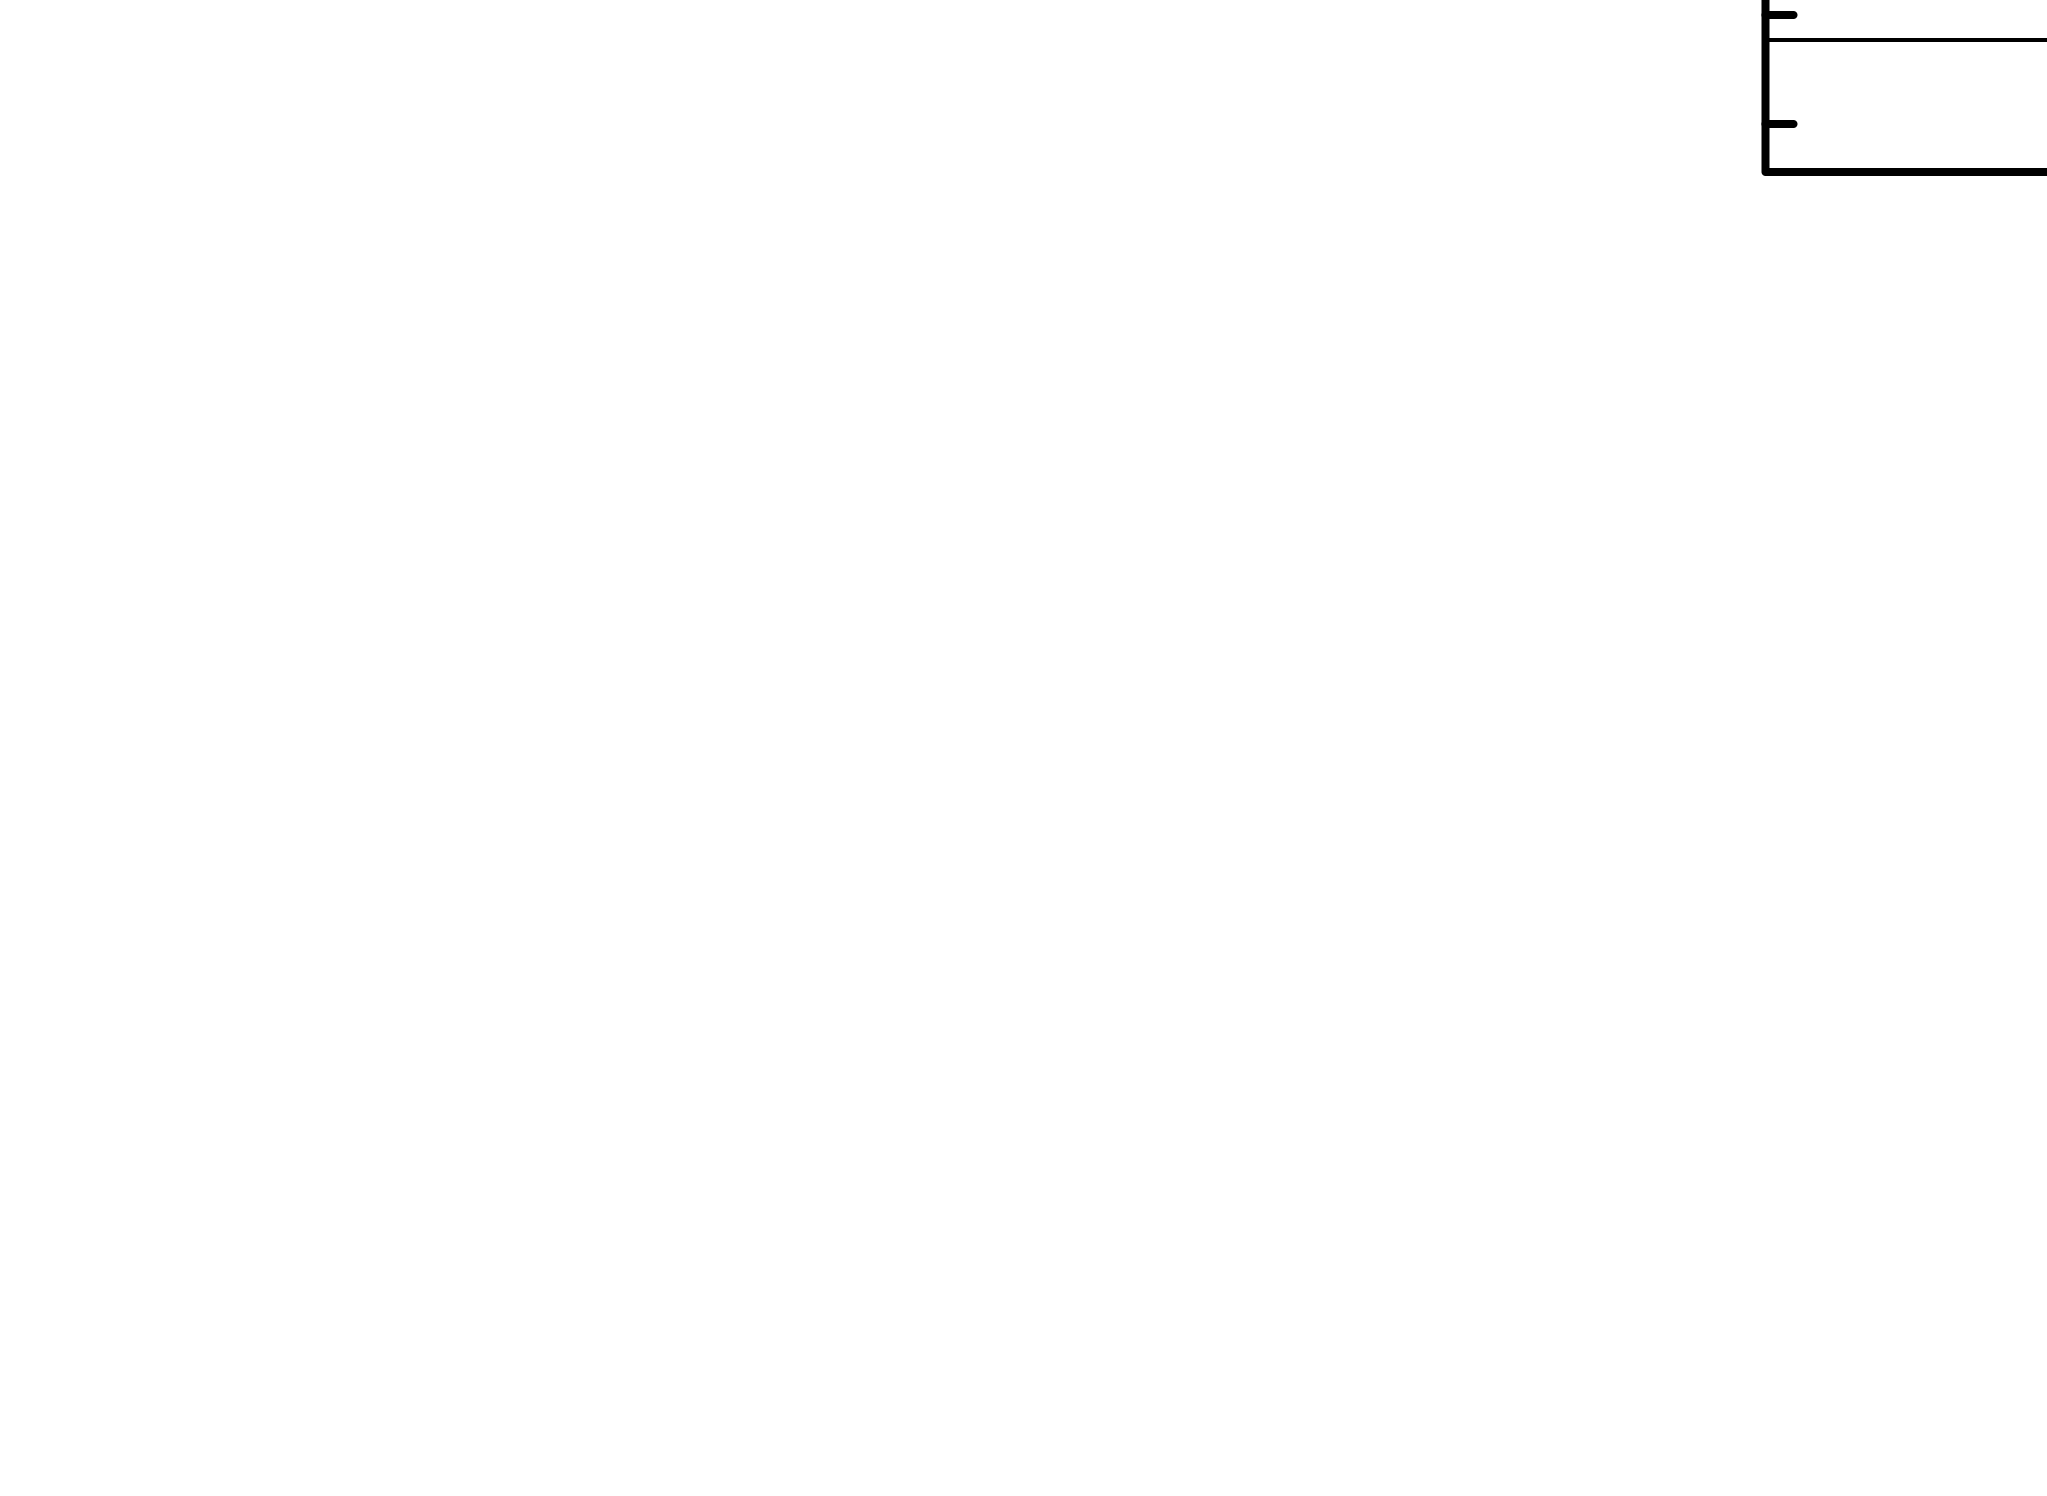


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.229622e+10     using 6 bins.

Test statistic : Chi-Squared              7.229622e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
8.7678       1.83519      -3       1.78670       3.13901   4.09683e-05
7.11312      59336.2      -4       1.94944       2.94620   5.43695e-05
7.08057      6766.83      -5       1.87786       3.03368   5.31449e-05
7.0

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

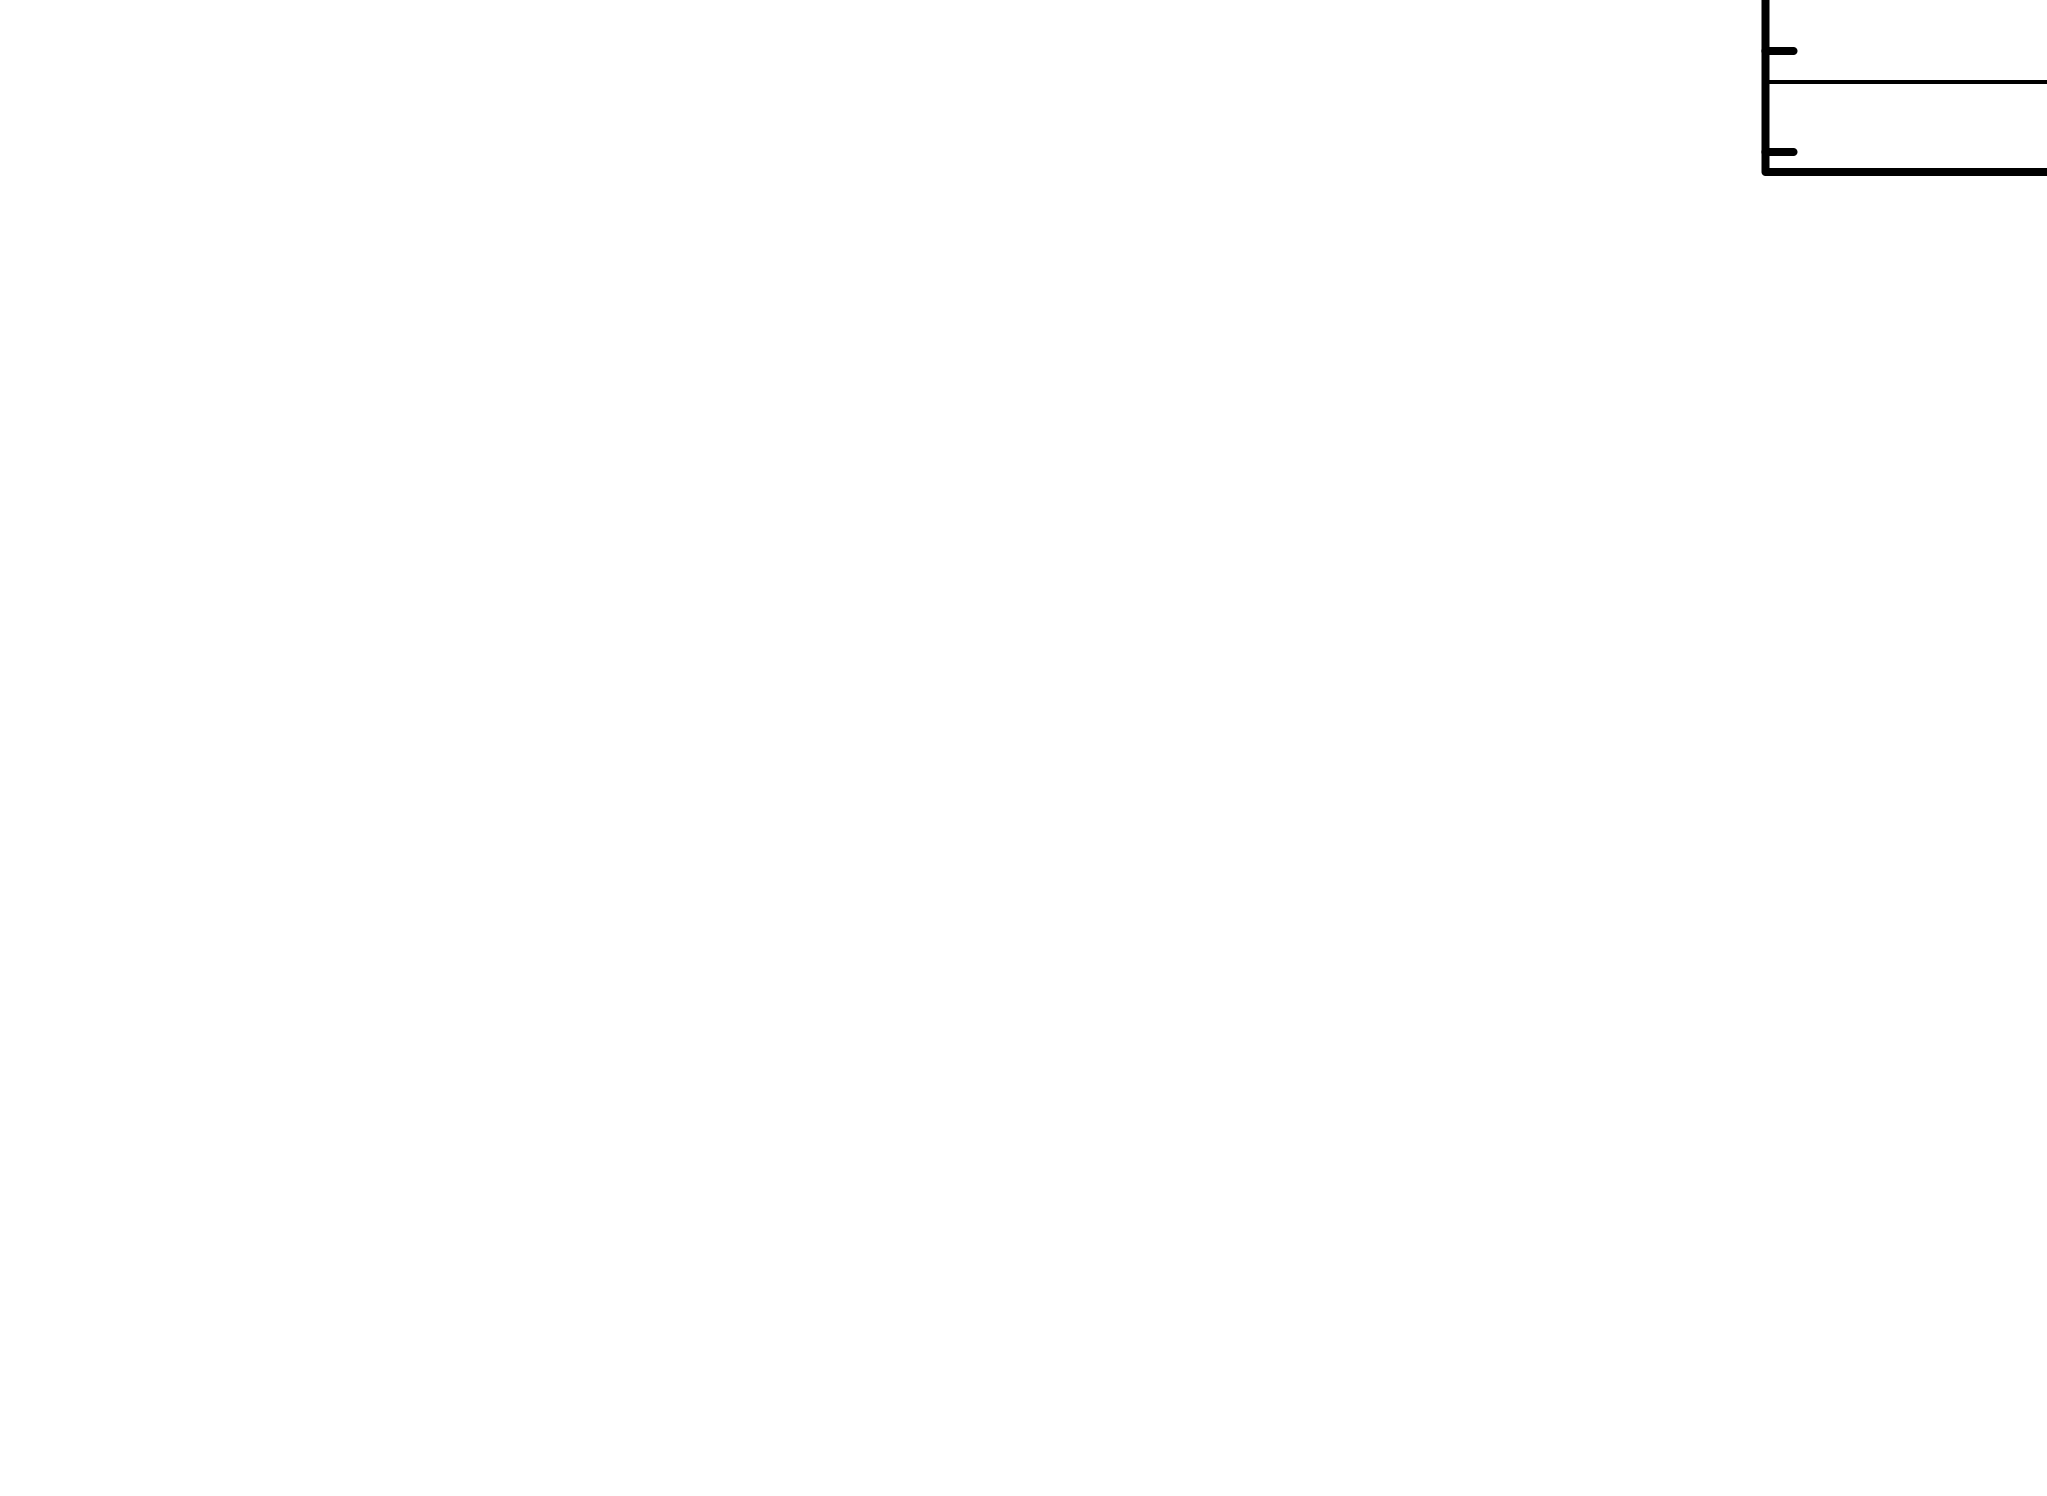


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.831442e+10     using 6 bins.

Test statistic : Chi-Squared              2.831442e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
13.0595      3.0709       -3       2.21170       4.97749   7.0

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

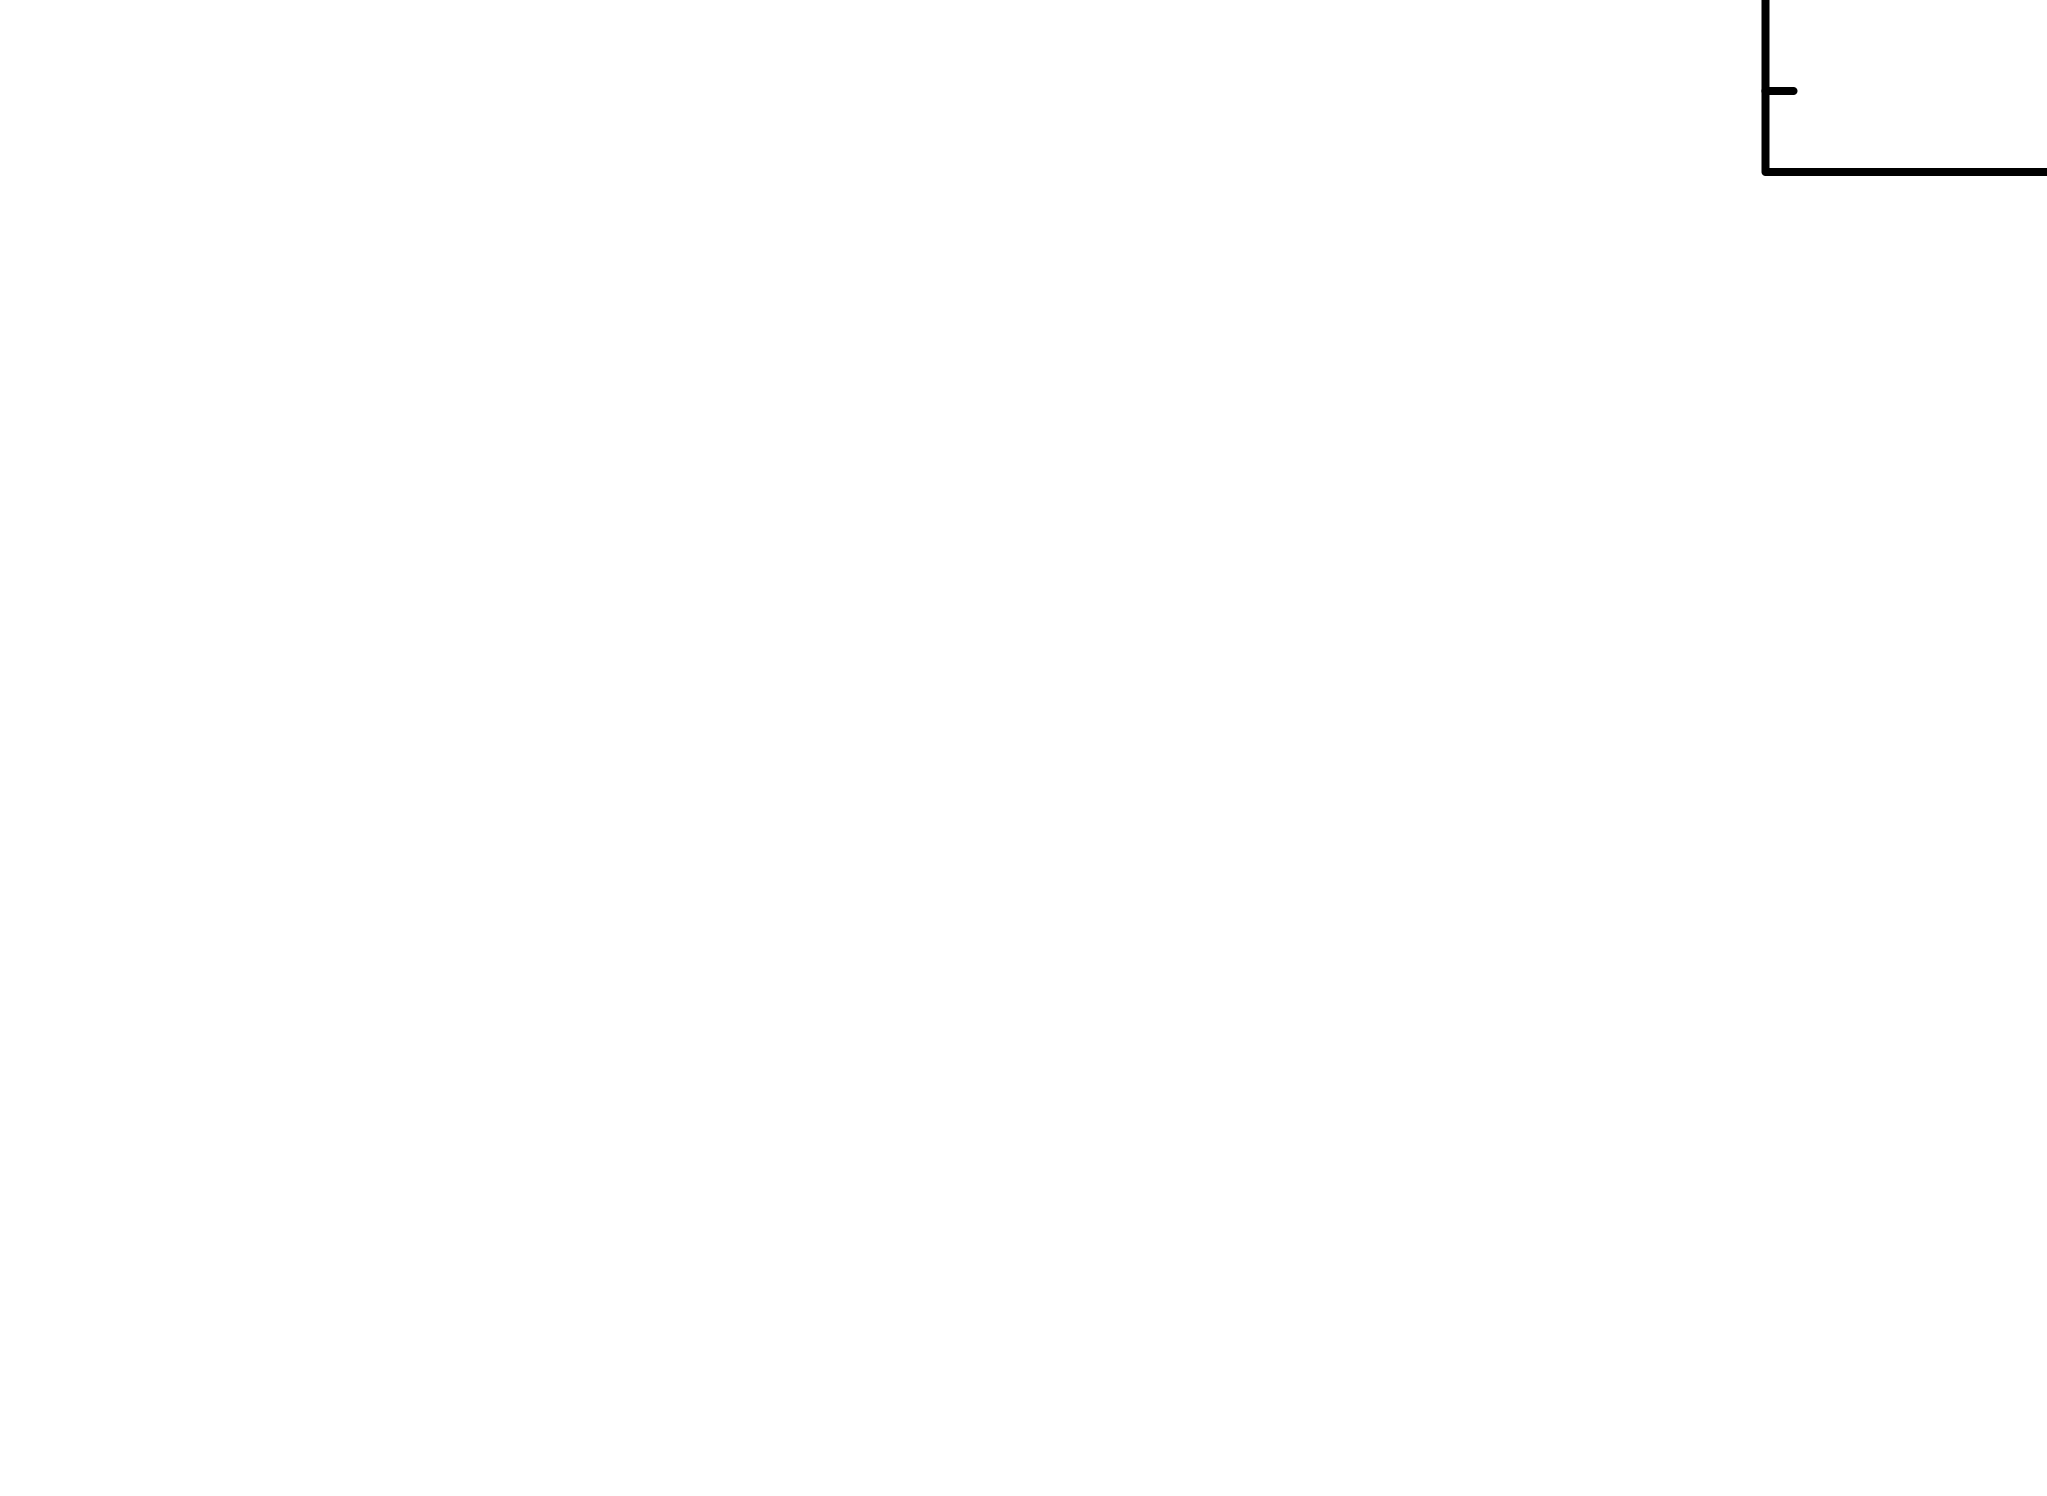


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.847191e+11     using 6 bins.

Test statistic : Chi-Squared              4.847191e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
11.1512      1.84419      -2       1.39281       1.69876   1.85935e-05
10.558       161990       -2       1.97864       2.25876   3.95752e-05
8.88208      83466.1      -3       2.47232       2.73138   8.05390e-05
6

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.4834e-05 photons (8.4256e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [11]:
#plx = 1.4843
d_kpc = 8
F_x = 8.4256*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

6.450038311937637e+32


In [12]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
32.8095622942653


In [13]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.1844115383560353
